### FRUIT DATASET

#### We have 7 features/columns in the dataset

    Fruit_label
    Fruit_name
    Fruit_subtype
    Mass
    Width
    Height
    Color_score

#### Problem Question

The problem this machine learning algorithm seeks to solve is to be able to classify and identify different types of fruits

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#load the dataset
pd.options.display.max_columns = 1000
data = pd.read_csv('fruit_data.csv')
data.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
d_shape = data.shape
print('Ths shape of the dataset is ', d_shape)

Ths shape of the dataset is  (59, 7)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [5]:
data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [6]:
data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [9]:
data['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

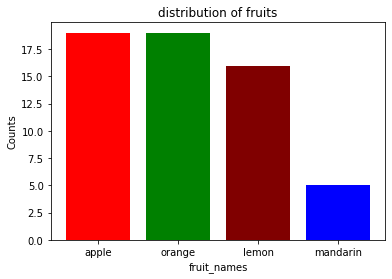

In [10]:
x = data['fruit_name'].value_counts().keys().tolist()
y = data['fruit_name'].value_counts().tolist()
color = ['red', 'green', 'maroon', 'blue']
plt.bar(x, y, color = color)
plt.title('distribution of fruits')
plt.xlabel('fruit_names')
plt.ylabel('Counts')
plt.show()

In [11]:
data.corr()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


<AxesSubplot: >

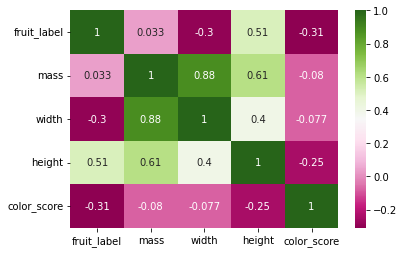

In [12]:
sns.heatmap(data.corr(), cmap ='PiYG', annot = True )

C:\Users\USER\AppData\Local\Temp\ipykernel_12628\3494602222.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mass'], color = 'g')


<AxesSubplot: xlabel='mass', ylabel='Density'>

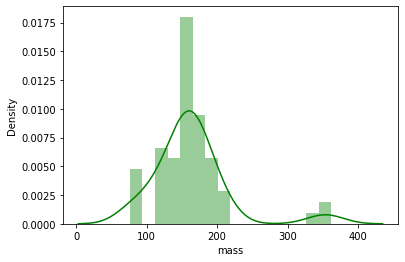

In [13]:
sns.distplot(data['mass'], color = 'g')

In [14]:
sub_type = data['fruit_subtype'].value_counts()
sub_type

turkey_navel        10
unknown             10
cripps_pink          6
selected_seconds     6
spanish_belsan       6
mandarin             5
braeburn             5
golden_delicious     5
granny_smith         3
spanish_jumbo        3
Name: fruit_subtype, dtype: int64

([<matplotlib.patches.Wedge at 0x1ca6c1ab3d0>,
 [Text(1.8092635573927127, 1.0660982036804425, 'turkey_navel'),
  Text(-0.055903174970450165, 2.0992557812301538, 'unknown'),
  Text(-1.616651418376166, 1.340312721517755, 'cripps_pink'),
  Text(-2.0970236628721786, 0.11176653056327449, 'selected_seconds'),
  Text(-1.7499592355998637, -1.1608801289275053, 'spanish_belsan'),
  Text(-0.8165307869154848, -1.9347551457533794, 'mandarin'),
  Text(0.27872361390180567, -2.0814209442238054, 'braeburn'),
  Text(1.2968017175986581, -1.6517582466066791, 'golden_delicious'),
  Text(1.863439373752895, -0.9682942219942341, 'granny_smith'),
  Text(2.073263546770088, -0.3340333301248782, 'spanish_jumbo')],
 [Text(1.3784865199182572, 0.8122652980422419, '16.9%'),
  Text(-0.04259289521558107, 1.5994329761753554, '16.9%'),
  Text(-1.2317344140008883, 1.0211906449659085, '10.2%'),
  Text(-1.5977323145692788, 0.08515545185773293, '10.2%'),
  Text(-1.3333022747427532, -0.88448009823048, '10.2%'),
  Text(-0.6221

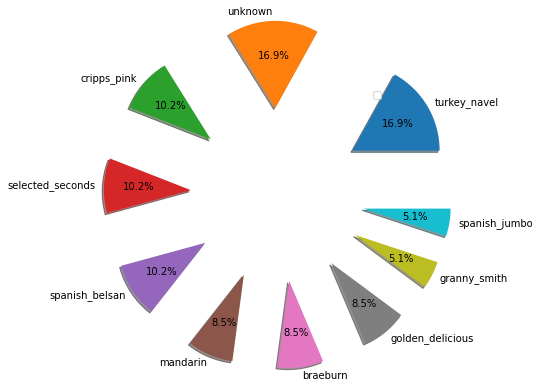

In [15]:
x = data['fruit_subtype'].value_counts().keys().tolist()
y = data['fruit_subtype'].value_counts().tolist()
labels =['turkey_navel', 'unknown', 'cripps_pink', 'selected_seconds', 'spanish_belsan', 'mandarin', 'braeburn', 'golden_delicious','granny_smith', 'spanish_jumbo']
sizes = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
plt.legend(labels, loc = 'upper right')
plt.pie(sub_type, sizes, labels = labels, shadow = True, autopct ='%.1f%%')

In [16]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### Splitting the data into test_train

In [17]:
#We are using only 3 features here to how important a feature is for prediction
feature_names = ['mass', 'width', 'height']
X = data[feature_names]
Y = data['fruit_label']
#split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)

In [18]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((47, 3), (12, 3), (47,), (12,))

#### MinMaxscaling Data pre-processing

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Using LogisticRegression Model

In [20]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
model1 = logReg.fit(X_train, Y_train)  

In [21]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(model1.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(model1.score(X_test, Y_test)))

Accuracy of Logistic regression classifier on training set: 0.79
Accuracy of Logistic regression classifier on test set: 0.58


In [22]:
pred_train = model1.predict(X_train)
print('first 20 prdicted: ', pred_train[:30])
print()
print('first 20 Original: ', Y_train[:30].values)

first 20 prdicted:  [1 1 3 1 4 2 1 1 4 1 1 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 1]

first 20 Original:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 3]


### Using RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators = k, random_state = 0)
    model2 = rfc.fit(X_train, Y_train)

In [24]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(model2.score(X_train, Y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(model2.score(X_test, Y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.75


In [25]:
pred_train1 = model2.predict(X_train)
print('first 20 prdicted: ', pred_train[:30])
print()
print('first 20 Original: ', Y_train[:30].values)

first 20 prdicted:  [1 1 3 1 4 2 1 1 4 1 1 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 1]

first 20 Original:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 3]


#### Using KNeighborsClassifier Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model3 = knn.fit(X_train, Y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(model3.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(model3.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.67


In [27]:
pred_train2 = model3.predict(X_train)
print('first 20 prdicted: ', pred_train[:30])
print()
print('first 20 Original: ', Y_train[:30].values)

first 20 prdicted:  [1 1 3 1 4 2 1 1 4 1 1 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 1]

first 20 Original:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 3]


#### Using DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
print('Accuracy of DecisionTreeClassifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of DecisionTreeClassifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

Accuracy of DecisionTreeClassifier on training set: 1.00
Accuracy of DecisionTreeClassifier on test set: 0.75


#### Using Support Vector Machine

In [29]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
print('Accuracy of Support Vector Machine on training set: {:.2f}'
     .format(svm.score(X_train, Y_train)))
print('Accuracy of Support Vector Machine on test set: {:.2f}'
     .format(svm.score(X_test, Y_test)))

Accuracy of Support Vector Machine on training set: 0.83
Accuracy of Support Vector Machine on test set: 0.75


# The above Algorithms were modeled without checking for and removing outliers in the dataset

### Let's check for outliers and run our models again to check for changes

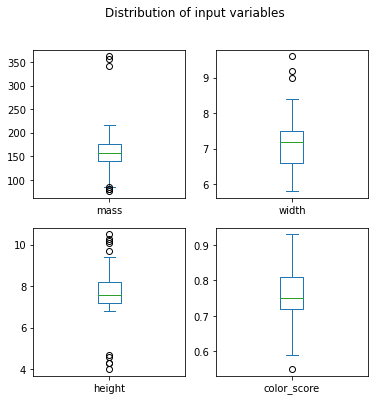

In [30]:
#Checking for outliers
data.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(6, 6), 
                                        title='Distribution of input variables')
plt.savefig('fruits_box')

### Using Interquartile range to check for outliers

In [31]:
data1 = data[['fruit_label','mass', 'width', 'height', 'color_score']]
data1.head(2)

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59


In [32]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower limits
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Identify the outliers
outliers = data1[(data1 < lower_limit) | (data1 > upper_limit)]
print(outliers)

    fruit_label   mass  width  height  color_score
0           NaN    NaN    NaN     NaN         0.55
1           NaN    NaN    NaN     NaN          NaN
2           NaN    NaN    NaN     NaN          NaN
3           NaN    NaN    NaN     4.7          NaN
4           NaN   84.0    NaN     4.6          NaN
5           NaN   80.0    NaN     4.3          NaN
6           NaN   80.0    NaN     4.3          NaN
7           NaN   76.0    NaN     4.0          NaN
8           NaN    NaN    NaN     NaN          NaN
9           NaN    NaN    NaN     NaN          NaN
10          NaN    NaN    NaN     NaN          NaN
11          NaN    NaN    NaN     NaN          NaN
12          NaN    NaN    NaN     NaN          NaN
13          NaN    NaN    NaN     NaN          NaN
14          NaN    NaN    NaN     NaN          NaN
15          NaN    NaN    NaN     NaN          NaN
16          NaN    NaN    NaN     NaN          NaN
17          NaN    NaN    NaN     NaN          NaN
18          NaN    NaN    NaN  

In [33]:
# Remove the outliers
data1 = data1[(data1 >= lower_limit) & (data1 <= upper_limit)]
data1.head(5)

,fruit_label,mass,width,height,color_score
0,1,192.0,8.4,7.3,NaN
1,1,180.0,8.0,6.8,0.59
2,1,176.0,7.4,7.2,0.60
3,2,86.0,6.2,NaN,0.80
4,2,NaN,6.0,NaN,0.79


##### After removing outliers, I added the last feature to see if there will be an improvement in the model

In [34]:

feature_names = ['mass', 'width', 'height', 'color_score']
A = data[feature_names]
B = data['fruit_label']
#split the data
A_train, A_test, B_train, B_test = train_test_split(A, B, random_state = 0, test_size = 0.2)

In [35]:
A_train.shape, A_test.shape, B_test.shape, B_train.shape

((47, 4), (12, 4), (12,), (47,))

In [36]:
scaler = MinMaxScaler()
A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

#### Using LogisticRegression()

In [37]:
logReg = LogisticRegression()
model_log = logReg.fit(A_train, B_train) 

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(model_log.score(A_train, B_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(model_log.score(A_test, B_test)))

Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.42


In [38]:
pred_train = model_log.predict(A_train)
print('first 20 prdicted: ', pred_train[:30])
print()
print('first 20 Original: ', B_train[:30].values)

first 20 prdicted:  [1 1 3 1 4 2 1 1 4 1 1 4 1 4 3 1 2 3 1 4 1 4 3 1 3 1 4 4 4 1]

first 20 Original:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 3]


#### Using KNeighborsClassifier()

In [39]:
knn = KNeighborsClassifier()
model = knn.fit(A_train, B_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(model.score(A_train, B_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(model.score(A_test, B_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 1.00


In [40]:
pred_train = model.predict(A_train)
print('first 20 prdicted: ', pred_train[:30])
print()
print('first 20 Original: ', B_train[:30].values)

first 20 prdicted:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 1 1 4 1 4 1 1 3 1 4 4 4 3]

first 20 Original:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 3]


##### We recorded a perfect prediction using Knn. This shows that the color_score feature is a very important feature indetermining the accuracy of the model

#### Using Support Vector Machine

In [41]:
svm = SVC()
model_svm = svm.fit(A_train, B_train)
print('Accuracy of Support Vector Machine on training set: {:.2f}'
     .format(model_svm.score(A_train, B_train)))
print('Accuracy of Support Vector Machine on test set: {:.2f}'
     .format(model_svm.score(A_test, B_test)))

Accuracy of Support Vector Machine on training set: 0.96
Accuracy of Support Vector Machine on test set: 1.00


In [42]:
pred_train = model_svm.predict(A_train)
print('first 20 prdicted: ', pred_train[:30])
print()
print('first 20 Original: ', B_train[:30].values)

first 20 prdicted:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 3 1 4 1 4 1 3 3 3 4 4 4 3]

first 20 Original:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 3]


#### Using DecisionTreeClassifier

In [43]:
clf = DecisionTreeClassifier()
model_clf = clf.fit(A_train, B_train)
print('Accuracy of DecisionTreeClassifier on training set: {:.2f}'
     .format(model_clf.score(A_train, B_train)))
print('Accuracy of DecisionTreeClassifier on test set: {:.2f}'
     .format(model_clf.score(A_test, B_test)))

Accuracy of DecisionTreeClassifier on training set: 1.00
Accuracy of DecisionTreeClassifier on test set: 0.92


In [44]:
pred_train = model_clf.predict(A_train)
print('first 20 prdicted: ', pred_train[:30])
print()
print('first 20 Original: ', B_train[:30].values)

first 20 prdicted:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 3]

first 20 Original:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 3]


In [45]:
#pip install graphviz

In [46]:
#pip install dtreeviz

In [47]:
from sklearn import tree
#Exporting Decision Tree to the text representation can be useful when working on applications whitout user interface or
#when we want to log information about the model into the text file. You can check details about export_text in the sklearn

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.25
|   |--- feature_3 <= 0.55
|   |   |--- class: 4
|   |--- feature_3 >  0.55
|   |   |--- class: 2
|--- feature_1 >  0.25
|   |--- feature_3 <= 0.74
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_2 <= 0.68
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.68
|   |   |   |   |--- class: 4
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 3
|   |--- feature_3 >  0.74
|   |   |--- class: 1



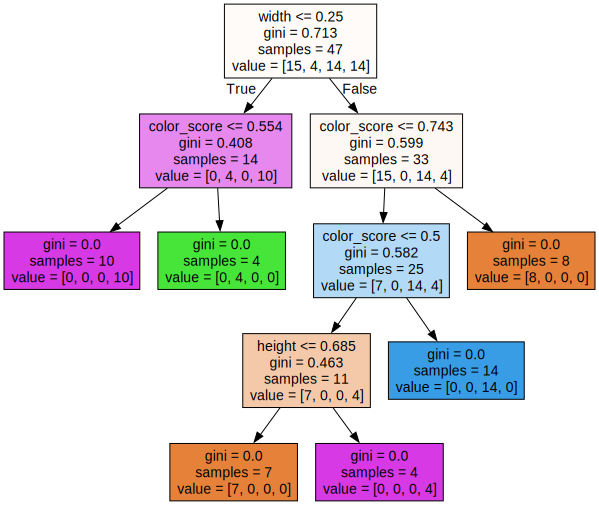

In [48]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = feature_names, class_names = None , filled = True )
graph = graphviz.Source(dot_data, format = "png")
graph

In [49]:
#from dtreeviz.trees import dtreeviz

#viz = dtreeviz(clf, A, B,
               # target_name= data['fruit_label'],
                #feature_names= feature,
                #class_names=list(data['fruit_label']))
#viz

ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\dtreeviz\trees.py)

### After checking the predicted and the original label with 30 values, we can see that this model fits well

#### Using RAndomForestClassifier


In [48]:
for k in range(1, 6):
    rfc = RandomForestClassifier(n_estimators = k, random_state = 0)
    model_rfc = rfc.fit(A_train, B_train)
    
    print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(model_rfc.score(A_train, B_train)))
    print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(model_rfc.score(A_test, B_test)))

Accuracy of Random Forest classifier on training set: 0.91
Accuracy of Random Forest classifier on test set: 0.75
Accuracy of Random Forest classifier on training set: 0.96
Accuracy of Random Forest classifier on test set: 0.83
Accuracy of Random Forest classifier on training set: 0.98
Accuracy of Random Forest classifier on test set: 0.83
Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.75
Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.83


In [49]:
pred_train = model_rfc.predict(A_train)
print('first 20 prdicted: ', pred_train[:30])
print()
print('first 20 Original: ', B_train[:30].values)

first 20 prdicted:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 3]

first 20 Original:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 3]


#### This model also fits well after comparing the predicted and original target values

#### Using Gaussian Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model_gnb = gnb.fit(A_train, B_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(model_gnb.score(A_train, B_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(model_gnb.score(A_test, B_test)))

Accuracy of GNB classifier on training set: 0.85
Accuracy of GNB classifier on test set: 0.83


In [51]:
pred_train = model_gnb.predict(A_train)
print('first 20 prdicted: ', pred_train[:30])
print()
print('first 20 Original: ', B_train[:30].values)

first 20 prdicted:  [1 3 3 1 4 2 1 1 4 1 1 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 1]

first 20 Original:  [3 3 3 3 4 2 1 3 4 3 3 4 1 4 3 1 2 3 1 4 1 4 1 1 3 1 4 4 4 3]


In [52]:
from sklearn.metrics import confusion_matrix, classification_report
pred = svm.predict(A_test)
conf_m = classification_report(B_test, pred)
print('confusion_matrix\n', conf_m)

confusion_matrix
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

